In [1]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import sqlite3
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn import decomposition
from sklearn.cluster import KMeans
import random

%matplotlib inline

# read in data (x) and labels (y)
data = pd.read_csv("x_named_z.csv", low_memory=False, index_col=0)
labels = pd.read_csv('y_named.csv', header=None) 

x = data
x = x.drop('UNITID', axis=1)

y = pd.read_csv('y_named.csv', low_memory=False, header=None)
schools = y.ix[:,0]
y.index = schools
list_schools = schools.tolist()
y.index = list_schools
y = y.drop(0,axis=1)

# split the data and labels in training and testing segments
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

In [2]:
# 3-fold cross validated hyperparameter fine tuning with gridsearchcv

# # Hyperparameter optimization for LinearSVC using Grid Search Cross-Validation
# C_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# max_iter_range = [100, 500, 1000]
# parameters = {"C":C_range, "max_iter":max_iter_range}
# clf = GridSearchCV(lsvc, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for SVC using Grid Search Cross-Validation
# C_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# parameters = {"C":C_range}
# clf = GridSearchCV(svc, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for KNN using Grid Search Cross-Validation
# parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'leaf_size': [10,20,30,40,50,60,70,80,90,100]}]
# clf = GridSearchCV(knn, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for Decision Tree using Grid Search Cross-Validation
# parameters = [{'max_features': ['auto', 'log2'], 'max_depth': [10,20,30,40,50,60,70,80,90,100]}]
# clf = GridSearchCV(dt, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for Random Forest using Grid Search Cross-Validation
# parameters = [{"n_estimators": [5, 10, 20, 50]}]
# clf = GridSearchCV(rf, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


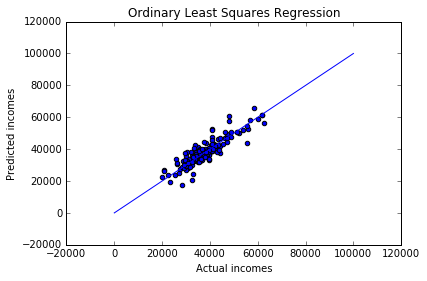

RMSE: 1    4005.253668
dtype: float64
r2: 0.761208926088


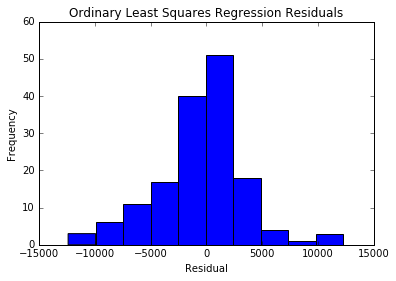

                                                               1
Rutgers University-Newark                          -12387.281778
Pennsylvania State University-Penn State Lehigh... -11728.433984
Pennsylvania State University-Penn State York      -11050.883403
Rutgers University-Camden                           -9411.649795
Swedish Institute a College of Health Sciences      -8643.166769
Florida National University-Main Campus             -8355.560188
Baker College of Flint                              -8024.047925
SUNY at Purchase College                            -7550.387495
South University-The Art Institute of Dallas        -7488.178508
Oklahoma City University                            -7364.773793
                                                   1
Westwood College-Los Angeles            12259.805657
Fairfield University                    11905.854977
Savannah State University               11050.116011
Prescott College                         8524.977942
Auburn University   

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


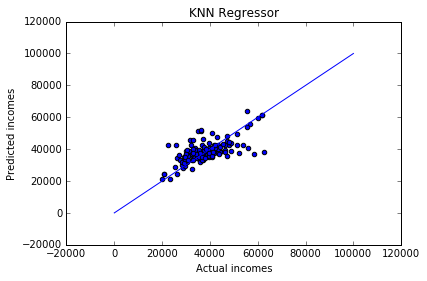

RMSE: 1    6251.031707
dtype: float64
r2: 0.418350393378


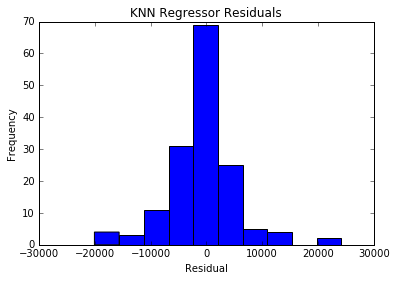

                                             1
Naropa University                       -20060
Florida National University-Main Campus -16760
California College of the Arts          -16720
Metropolitan State University of Denver -15960
Eastern Connecticut State University    -14940
Hendrix College                         -14400
Prescott College                        -13000
Thomas University                       -10320
Westmont College                         -9480
New York College of Health Professions   -9300
                                                   1
Rose-Hulman Institute of Technology            24200
University of Oklahoma-Health Sciences Center  21940
New York School of Interior Design             15020
Bryan College of Health Sciences               14800
Butler University                              11240
CUNY Bernard M Baruch College                  11240
Michigan Technological University              10020
Pace University-New York                        8340
The Un

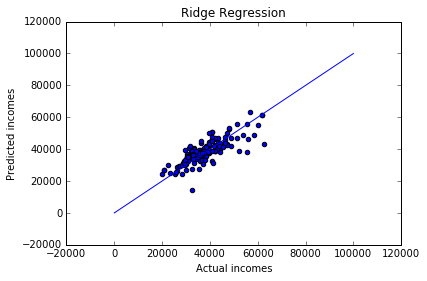

RMSE: 1    5087.399163
dtype: float64
r2: 0.614743776096


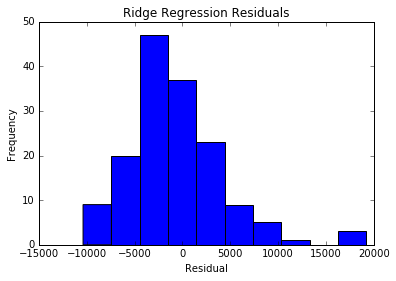

                                                               1
McDaniel College                                   -10389.867497
Hendrix College                                    -10071.606305
Baker College of Flint                             -10036.131362
Pennsylvania State University-Penn State Lehigh...  -9988.667860
Pennsylvania State University-Penn State York       -9597.776726
Touro College                                       -9282.843408
Metropolitan State University of Denver             -8644.777414
Naropa University                                   -7943.959630
Eastern Connecticut State University                -7638.214379
Greensboro College                                  -6957.830499
                                                          1
Rose-Hulman Institute of Technology            19217.504948
Westwood College-Los Angeles                   18380.520952
Fairfield University                           17180.041815
Bryan College of Health Sciences             

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


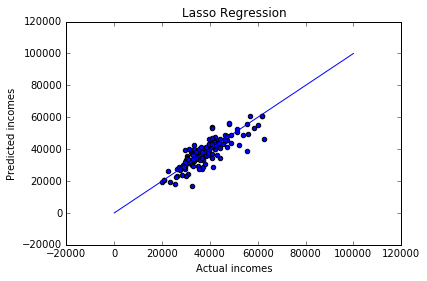

RMSE: 1    4716.403986
dtype: float64
r2: 0.668884103925


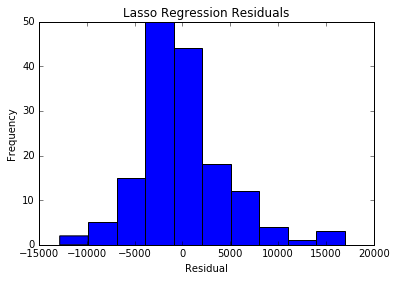

                                                               1
Pennsylvania State University-Penn State Lehigh... -12829.338445
Pennsylvania State University-Penn State York      -12584.639750
Baker College of Flint                              -9717.772680
South University-The Art Institute of Dallas        -9080.742499
Touro College                                       -8790.980073
Rutgers University-Camden                           -8103.382758
Rutgers University-Newark                           -7780.113798
Greensboro College                                  -6805.782876
McDaniel College                                    -6525.959112
Governors State University                          -6178.131407
                                                    1
Fairfield University                     16989.568714
Westwood College-Los Angeles             16064.649169
Rose-Hulman Institute of Technology      15910.976053
Roger Williams University School of Law  12272.927766
Bryan College o

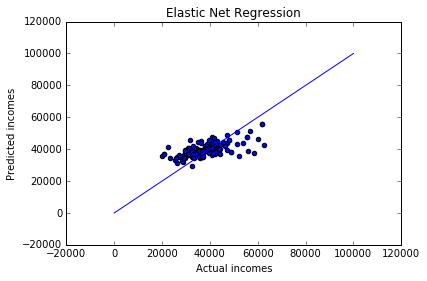

RMSE: 1    6514.980857
dtype: float64
r2: 0.368193160251


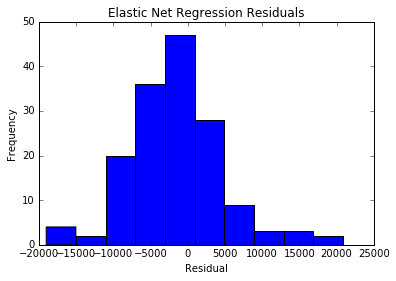

                                                   1
Naropa University                      -19025.815981
Caribbean University-Ponce             -15868.097533
Caribbean University-Vega Baja         -15846.241222
Universidad Metropolitana              -15624.292071
Hendrix College                        -14336.914327
American University of Puerto Rico     -11460.356433
Baker College of Flint                  -9918.074083
Grace College and Theological Seminary  -9868.667678
University of Alaska Southeast          -9678.561521
Lancaster Bible College                 -9667.063151
                                                          1
University of Oklahoma-Health Sciences Center  20867.003082
Rose-Hulman Institute of Technology            19831.420473
Bryan College of Health Sciences               16874.280007
New York School of Interior Design             16860.564087
Washington and Lee University                  13324.514217
Washington Adventist University                10727.7268

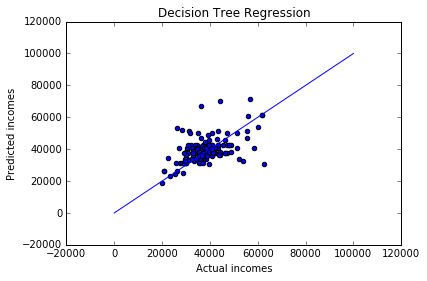

RMSE: 1    8042.440521
dtype: float64
r2: 0.0372051677462


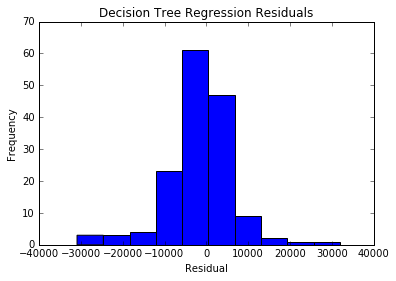

                                                  1
Eastern Connecticut State University  -30900.000000
Southern University and A & M College -26800.000000
Auburn University                     -26000.000000
Savannah State University             -23600.000000
Touro College                         -20116.666667
Hendrix College                       -18692.307692
California College of the Arts        -15392.307692
Northwestern University               -15100.000000
Valley Forge Christian College        -13338.775510
Naropa University                     -12325.000000
                                                          1
Rose-Hulman Institute of Technology            31900.000000
Butler University                              21200.000000
Bryan College of Health Sciences               18541.904762
University of Oklahoma-Health Sciences Center  17803.125000
Washington Adventist University                10862.686567
Pace University-New York                       10403.125000
CUNY Ber

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


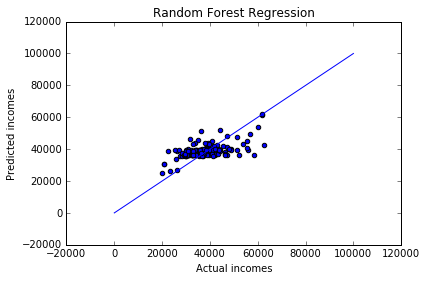

RMSE: 1    6628.64702
dtype: float64
r2: 0.345954711597


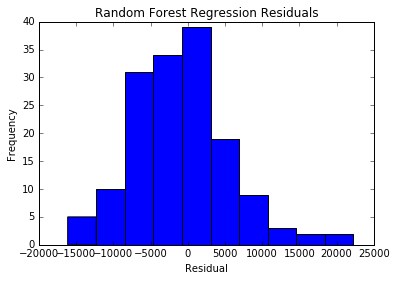

                                                  1
Naropa University                     -16138.197596
Eastern Connecticut State University  -14812.774522
Hendrix College                       -14696.728709
Martin University                     -13901.720767
Southern University and A & M College -12571.781146
Valley Forge Christian College        -12262.603185
California College of the Arts        -10983.981749
Prescott College                      -10454.328457
Caribbean University-Vega Baja         -9820.575979
Caribbean University-Ponce             -9820.575979
                                                          1
University of Oklahoma-Health Sciences Center  22275.198714
Rose-Hulman Institute of Technology            20210.887601
New York School of Interior Design             16196.162607
Bryan College of Health Sciences               16014.801434
Rice University                                14532.348931
Pace University-New York                       11428.713091
CUNY Ber

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [3]:
def plotPred(y_predict, y_test, name):
    plt.figure()
    plt.scatter(y_test, y_predict)
    t = np.arange(0, 100000, 1)
    plt.plot(t,t)
    plt.xlabel('Actual incomes')
    plt.ylabel('Predicted incomes')
    plt.title(name)
    plt.show()
    print("RMSE:", rmse(y_test, y_predict))    
    print("r2:", r2_score(y_test, y_predict))

def rmse(y_test, y_predict):    
    a = y_test - y_predict
    a = a ** 2
    a = a.mean()
    a = np.sqrt(a)
    return a 

def plotResiduals(y_predict, y_test, name):
    plt.figure()
    plt.hist(y_test-y_predict)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title(name + ' Residuals')
    plt.show()

def listTenLargestResiduals(y_predict, y_test):
    residuals = y_test-y_predict
    residuals_10worst = residuals.sort(1,axis=0)
    print(residuals_10worst.head(n=10))
    residuals_10best = residuals.sort(1,axis=0,ascending=False)
    print(residuals_10best.head(n=10))

# fit and test the regressor, output graph and evaluation statistics
def regress(model, name):
    reg = model
    reg.fit(x_train, y_train)
    y_predict = reg.predict(x_test)
    y_predict = np.reshape(y_predict, (len(y_predict),1))    
    plotPred(y_predict, y_test, name)
    plotResiduals(y_predict, y_test, name)
    listTenLargestResiduals(y_predict, y_test)
        
regress(linear_model.LinearRegression(), 'Ordinary Least Squares Regression')
regress(KNeighborsRegressor(), "KNN Regressor")
regress(linear_model.Ridge(), 'Ridge Regression')
regress(linear_model.Lasso(), 'Lasso Regression')
regress(linear_model.ElasticNet(), 'Elastic Net Regression')
regress(DecisionTreeRegressor(max_depth=10), 'Decision Tree Regression')
regress(RandomForestRegressor(n_estimators = 100, max_depth = 5, warm_start = False), 'Random Forest Regression')

In [4]:
# feature importance 

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
coef = pd.DataFrame(reg.coef_.T, index=x.columns.values)
coef = coef.sort(0,axis=0, ascending=False)
coef

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,0
UGDS_AIAN,3.660644e+09
UGDS_ASIAN,3.598639e+09
UGDS_2MOR,3.517001e+09
UGDS_BLACK,3.490448e+09
UGDS_UNKN,3.470154e+09
UGDS_NHPI,3.467752e+09
UGDS_HISP,3.416699e+09
UGDS_NRA,3.407306e+09
UGDS_WHITE,3.385434e+09
PCIP29,1.219277e+09


In [5]:
from sklearn.feature_selection import SelectFromModel
print(x.shape)
reg = linear_model.LinearRegression().fit(x, y)
x_new = SelectFromModel(reg, prefit=True).transform(x)
print(x_new.shape)

(1534, 230)
(1534, 21)


/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


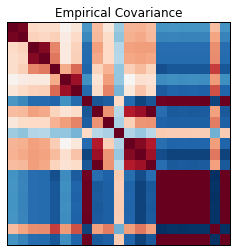

In [6]:
# plotting covariance matrix after feature selection
# http://scikit-learn.org/stable/auto_examples/covariance/plot_sparse_cov.html
x_new = SelectKBest(f_regression, k=21).fit_transform(x, y)
x_norm = []
x_norm[:] = x_new[:]
x_norm = np.asarray(x_norm)
x_norm -= x_norm.mean(axis=0)
x_norm /= x_norm.std(axis=0)

emp_cov = np.dot(x_norm.T, x_norm) / len(x_norm)
vmax = emp_cov.max()
vmin = emp_cov.min()
plt.imshow(emp_cov, interpolation='nearest', vmin=vmin, vmax=vmax,
           cmap=plt.cm.RdBu_r)
plt.xticks(())
plt.yticks(())
plt.title('Empirical Covariance')
plt.show()

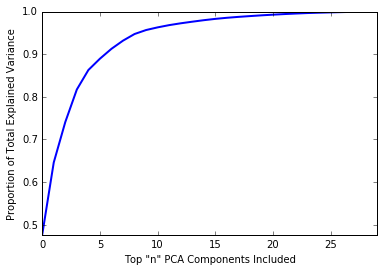

In [10]:
# PCA, number of features vs feature importance
# http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#example-plot-digits-pipe-py
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(x)

var_explained_cuml = []
var_explained_cuml.append(pca.explained_variance_ratio_[0])

for i in range(1, 30):
    var_explained_cuml.append(var_explained_cuml[i-1]+pca.explained_variance_ratio_[i])
plt.plot(var_explained_cuml, linewidth=2)
plt.axis('tight')
plt.xlabel('Top "n" PCA Components Included')
plt.ylabel('Proportion of Total Explained Variance')

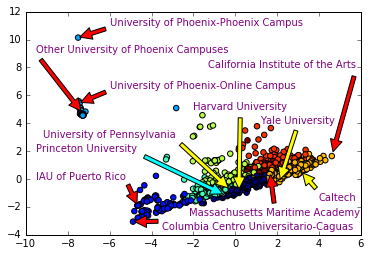

In [8]:
pca = decomposition.PCA(n_components=2)
pca.fit(x)
x_pca_reduced = pca.fit_transform(x)
x_pca_reduced_pd = pd.DataFrame(data=x_pca_reduced, index=list_schools, columns=['e1', 'e2'])  # 1st row as the column names

clusters = KMeans().fit_predict(x) #n_clusters=5
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_pca_reduced_pd.ix[:, 0], x_pca_reduced_pd.ix[:, 1], c=clusters, s=30)

# Harvard University
ax.annotate(x_pca_reduced_pd.index.values[516], xy=(x_pca_reduced_pd.ix[516,'e1'],x_pca_reduced_pd.ix[516,'e2']), 
            xytext=(-2,5), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# University of Phoenix - Phoenix Campus
ax.annotate(x_pca_reduced_pd.index.values[31], xy=(x_pca_reduced_pd.ix[31,'e1'], x_pca_reduced_pd.ix[31,'e2']), 
            xytext=(-6,11), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# Princeton University
ax.annotate(x_pca_reduced_pd.index.values[726], xy=(x_pca_reduced_pd.ix[726,'e1'], x_pca_reduced_pd.ix[726,'e2']), 
            xytext=(-9.5,2), color='purple', arrowprops=dict(facecolor='cyan', shrink=0.05))

# Massachusetts Maritime Academy
ax.annotate(x_pca_reduced_pd.index.values[525], xy=(x_pca_reduced_pd.ix[525,'e1'], x_pca_reduced_pd.ix[525,'e2']), 
            xytext=(-2.2,-2.6), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# California Institute of the Arts
ax.annotate(x_pca_reduced_pd.index.values[82], xy=(x_pca_reduced_pd.ix[82,'e1'], x_pca_reduced_pd.ix[82,'e2']), 
            xytext=(-1.3,8), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# University of Phoenix - Online Campus
ax.annotate(x_pca_reduced_pd.index.values[1434], xy=(x_pca_reduced_pd.ix[1434,'e1'], x_pca_reduced_pd.ix[1434,'e2']), 
            xytext=(-6,6.5), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# Other University of Phoenix Campuses
ax.annotate('Other University of Phoenix Campuses', xy=(x_pca_reduced_pd.ix[1499,'e1'], x_pca_reduced_pd.ix[1499,'e2']), 
            xytext=(-9.5,9.1), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# Yale University
ax.annotate(x_pca_reduced_pd.index.values[180], xy=(x_pca_reduced_pd.ix[180,'e1'], x_pca_reduced_pd.ix[180,'e2']), 
            xytext=(1.2,4), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# University of Pennsylvania
ax.annotate(x_pca_reduced_pd.index.values[1076], xy=(x_pca_reduced_pd.ix[1076,'e1'], x_pca_reduced_pd.ix[1076,'e2']), 
            xytext=(-9.2,3), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# Columbia Centro Universitario-Caguas
ax.annotate(x_pca_reduced_pd.index.values[1379], xy=(x_pca_reduced_pd.ix[1379,'e1'], x_pca_reduced_pd.ix[1379,'e2']), 
            xytext=(-3.5,-3.6), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# Caltech
ax.annotate('Caltech', xy=(x_pca_reduced_pd.ix[56,'e1'], x_pca_reduced_pd.ix[56,'e2']), 
            xytext=(4,-1.5), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# Inter American University of Puerto Rico
ax.annotate('IAU of Puerto Rico', xy=(x_pca_reduced_pd.ix[1391,'e1'], x_pca_reduced_pd.ix[1391,'e2']), 
            xytext=(-9.5,0), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

In [9]:
# add the violin plots of each cluster across different features to come to conclusions...
# https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html